## Online Payments Fraud Detection

* **Business Understanding -** The digital age brought with it a trend of online payments. This led to the mass adoption of Cashless transactions; with instant electronic transfers/payments resulting in massive time savings and convenience. However, the increase in electronic transactions also came with a substantial increase in online fraudulent transactions.

    The Case Study is of a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.

    The purpose of this project is to predict if an online transaction processed by the Bank is fraudulent or not, given the available data. The Machine Learning model with the best performance (accuracy, precision and/or recall) and the relevant variables (features) will be identified.
    
    This prediction would result in early detection of fraudulent online transactions and the deployment of necessary corrective actions to prevent loss of Funds. 
    
    
* **Data Understanding -** 
    The Data of transaction records obtained from the Bank is in a csv file containing 1,048,575 records. The Dataset consists of 10 variables (9 inout variables and 1 output variable) with details as stated below:
    
    **Input variables:**
    1. step - represents a unit of time where 1 step equals 1 hour
    2. type - type of online transaction
    3. amount - the amount of the transaction
    4. nameOrig - customer starting the transaction
    5. oldbalanceOrg - balance before the transaction
    6. newbalanceOrig - balance after the transaction
    7. nameDest - recipient of the transaction
    8. oldbalanceDest - initial balance of recipient before the transaction
    9. newbalanceDest - the new balance of the recipient after the transaction
    
    **Output variable:**
    1. isFraud - is the transaction fraud? (binary: 0 - not fraud; 1 - fraud)

In [1]:
# Import Libraries for Data manipulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Inspection

* The Dataset contains 10 variables (9 input variables and 1 output variable) and 1,048,575 rows
* There are no missing values in the dataset
* There are no duplicates in the dataset



In [3]:
# Import DataSet

data = pd.read_csv("Online Payment Fraud Detection.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
# Number of rows and columns in the dataset

data.shape

(1048575, 10)

In [5]:
# Descriptive statistics

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [6]:
data.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [7]:
# Check for missing values

data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

### There are no missing values

In [8]:
# Check data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


### Data contains 5 Float variables, 2 Integer variables and 3 Categorical (Object) variables

In [9]:
# Check for duplicates

data[data.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud


### There are no duplicates in the dataset

In [10]:
# Check number of unique values in the dataset

data.nunique()

step                   95
type                    5
amount            1009606
nameOrig          1048317
oldbalanceOrg      391033
newbalanceOrig     440792
nameDest           449635
oldbalanceDest     590110
newbalanceDest     437054
isFraud                 2
dtype: int64

### There are 5 different transaction types and over 1 million customers (nameOrig) initiating online transactions.

## Data Visualization

### Univaraite Analysis

### Bar Chart showing the distribution of Transaction Type

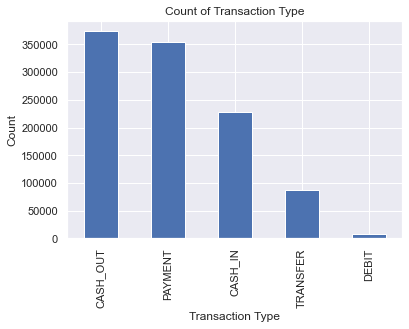

In [11]:
data.type.value_counts().plot.bar()
plt.title('Count of Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

*The Chart shows that Cash Out and Payment transactions are the most common transaction types.*

### Distribution Plot of Step Feature

Text(0.5, 1.0, 'Distribution Plot of Step Feature')

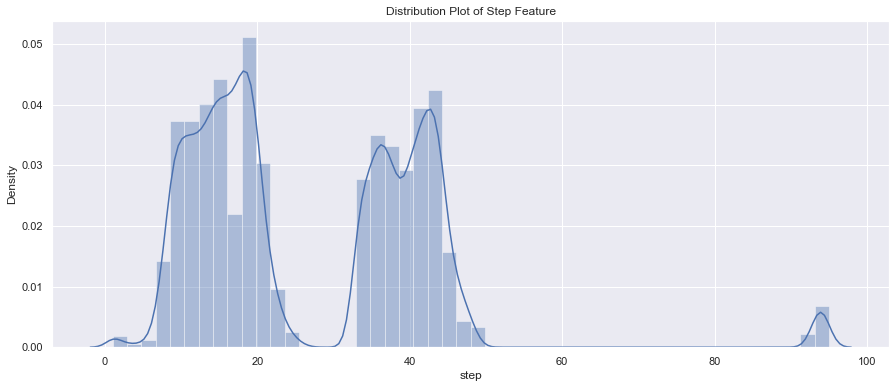

In [12]:
plt.figure(figsize=(15,6))
sns.distplot(data['step'])
plt.title("Distribution Plot of Step Feature")

*The graph shows the maximum distribution among 10 to 20 of step.*

### Distribution of output variable (isFraud)

In [13]:
data.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [14]:
Fraud_ratio = data.isFraud.value_counts(normalize=True)
display(Fraud_ratio)

0    0.998911
1    0.001089
Name: isFraud, dtype: float64

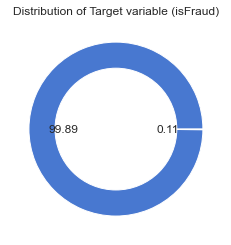

In [15]:
plt.pie(x=Fraud_ratio, colors= sns.color_palette('muted'), autopct= '%.2f')


#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Target variable (isFraud)', loc ='center')
plt.show()

### There is a significant imbalance in the output variable data ('isFraud'), where the proportion of nonfraudulent to fraudulent transactions is 99.9% to 0.1% respectively.

## Bivariate Analysis

### Bar Plot showing Amount per Transaction Type

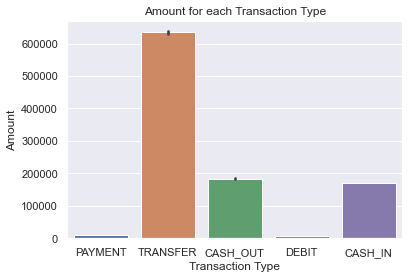

In [16]:
sns.barplot(x='type', y='amount', data=data)
plt.title('Amount for each Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

*The graph shows that more money is processed through Transfers and the least amounts are processed through Debit Transactions.*

### What is the transaction amount for fraudulent and nonfraudulent transactions?

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

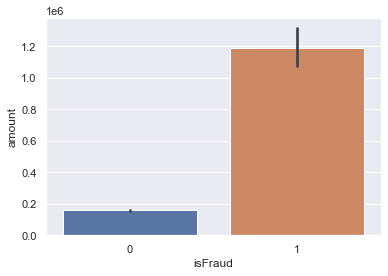

In [17]:
sns.barplot(x="isFraud",y="amount", data=data)

*The graph shows that although the number of Fraudulent transactions represented in the data is only about 0.1%, the transaction amount for fraudulent transactions is exponentially greater than the amounts for nonfraudulent transactions.*

### Bar Plot showing Transaction Type for Fraudulent transactions (isFraud=1)

Text(0.5, 1.0, 'Transaction Type for Fraudulent Transactions')

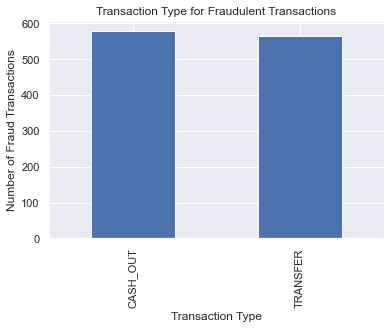

In [18]:
fraud = data['isFraud'].isin([1])

fraud_plot = data[fraud].groupby(['type']).size().plot(kind='bar')
fraud_plot.set_xlabel("Transaction Type")
fraud_plot.set_ylabel("Number of Fraud Transactions")
fraud_plot.set_title("Transaction Type for Fraudulent Transactions")

##plt.show()

*The Fraudulent transactions are evenly distributed between Cash out and Transfer Transactions*

### Correlations

In [19]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


<AxesSubplot:>

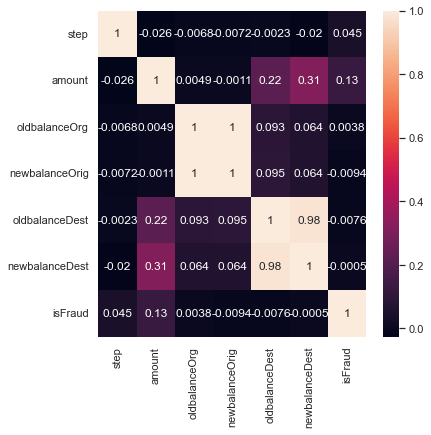

In [20]:
#Visualize Correlations in a heatmap

plt.figure(figsize=(6,6))
sns.heatmap(data.corr(), annot=True)

*The following input features have strong correlations:*
* *oldbalanceOrig and newbalanceOrig (1)*
* *oldbalanceDest and newbalanceDest (0.98)*

### Multivariate Analysis

In [21]:
#Pivot table showing 4 variables - isFraud, type, Count(Amount) and Sum(Amount)

pd.pivot_table(data, index=["isFraud","type"], values = 'amount', aggfunc= ["count","sum"])

count           sum
                  amount        amount
isFraud type                          
0       CASH_IN   227130  3.859476e+10
        CASH_OUT  373063  6.808435e+10
        DEBIT       7178  4.219599e+07
        PAYMENT   353873  3.936097e+09
        TRANSFER   86189  5.435484e+10
1       CASH_OUT     578  6.803839e+08
        TRANSFER     564  6.815984e+08

<AxesSubplot:xlabel='type', ylabel='amount'>

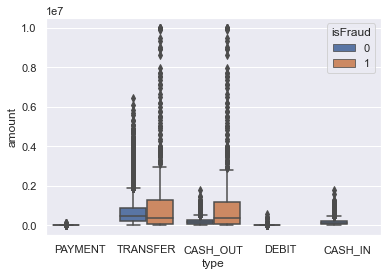

In [22]:
#Box Plot showing Fraud and notFraud transactions by Type and Amount

sns.boxplot(x="type", y="amount", hue="isFraud", data=data)

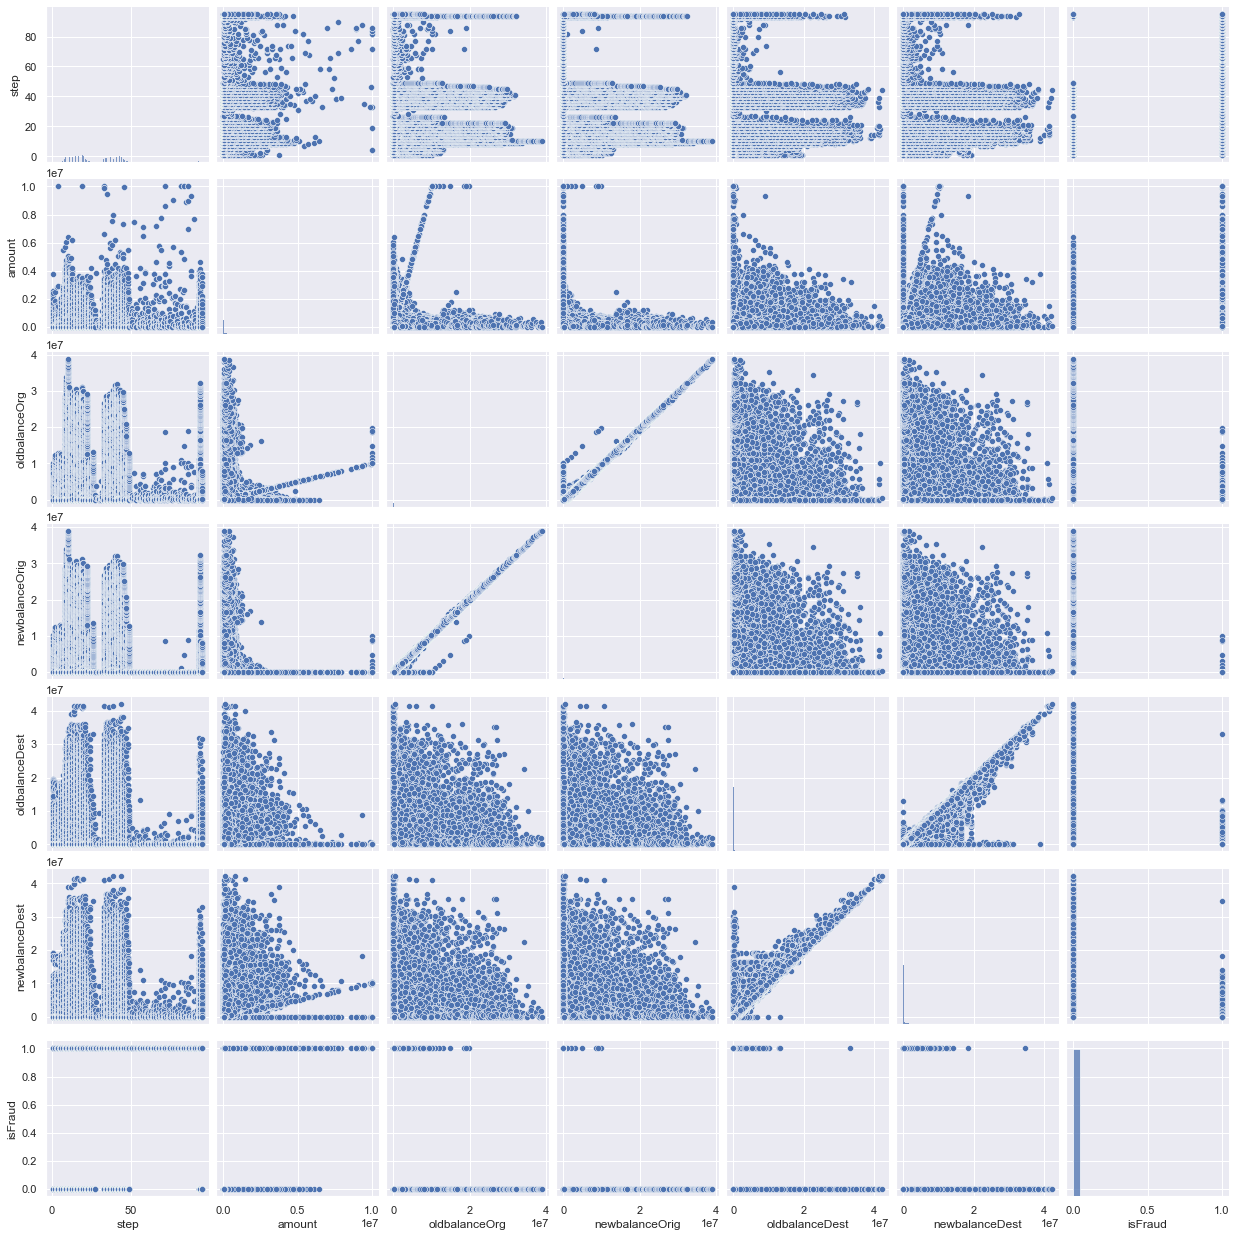

In [23]:
sns.pairplot(data)

## Feature Engineering

In [24]:
# Drop features with strong correlations

data.drop(['oldbalanceOrg', 'oldbalanceDest'], axis=1, inplace=True)
data.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0


In [25]:
# Encode categorical feature (type) using dummy encoding

encoded_type = pd.get_dummies(data['type'])
encoded_type.head()


,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [26]:
# Concactenate encoded data to the dataset

data = pd.concat([data,encoded_type], axis=1)
print(data.shape)
data.head()

(1048575, 13)


,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.0,0,0,0,0,1,0


In [27]:
# Drop irrelevant columns (All non-encoded categorical data variables - type, nameOrig, nameDest)

data = data.drop(['type','nameOrig','nameDest'], axis =1)
print(data.shape)
data.head()

(1048575, 10)


,step,amount,newbalanceOrig,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,160296.36,0.0,0,0,0,0,1,0
1,1,1864.28,19384.72,0.0,0,0,0,0,1,0
2,1,181.00,0.00,0.0,1,0,0,0,0,1
3,1,181.00,0.00,0.0,1,0,1,0,0,0
4,1,11668.14,29885.86,0.0,0,0,0,0,1,0


## Select Target and Features

In [28]:
y = data['isFraud']
X = data.drop('isFraud', axis=1)

In [29]:
print(X.head())
print(y.head())

   step    amount  newbalanceOrig  newbalanceDest  CASH_IN  CASH_OUT  DEBIT  \
0     1   9839.64       160296.36             0.0        0         0      0   
1     1   1864.28        19384.72             0.0        0         0      0   
2     1    181.00            0.00             0.0        0         0      0   
3     1    181.00            0.00             0.0        0         1      0   
4     1  11668.14        29885.86             0.0        0         0      0   

   PAYMENT  TRANSFER  
0        1         0  
1        1         0  
2        0         1  
3        0         0  
4        1         0  
0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64


## Modelling

Predictive models that will be used are Logistic Regression, Decision Tree Classifier, KNeighbors Classifier and Random Forest.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
# split into training and validation sets using a 30% split ratio

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3)

In [32]:
#Initialize models

LR = LogisticRegression()
DC = DecisionTreeClassifier()
KN = KNeighborsClassifier()
RF = RandomForestClassifier()

In [33]:
def plot_confusion_matrix(prediction, y_valid):
    c_matrix = confusion_matrix(prediction, y_valid)
    # Generating confusion Matrix with percentages
    ax = sns.heatmap(np.eye(2), annot=c_matrix/np.sum(c_matrix), fmt='.2%', cmap=sns.color_palette(['tomato', 'palegreen'], as_cmap=True), cbar=False, yticklabels=['True', 'False'], xticklabels=['True', 'False'])
    ax.set_title('Confusion Matrix');
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Not Fraud','Fraud'])
    ax.yaxis.set_ticklabels(['Not Fraud','Fraud'])
    # Additional text
    additional_texts = ['(True Positive)', '(False Negative)', '(False Positive)', '(True Negative)']
    for text_elt, additional_text in zip(ax.texts, additional_texts):
        ax.text(*text_elt.get_position(), '\n' + additional_text, color=text_elt.get_color(),
                ha='center', va='top', size=12)
    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [34]:
# Create a function to train models

models = [LR,DC,KN,RF]

def trainer(model, X_train, X_valid, y_train, y_valid):
    #fit model
    model.fit(X_train, y_train)
    #make predictions
    prediction = model.predict(X_valid)
    #print(f"{model} model training done!")
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction, y_valid))
    print(confusion_matrix(prediction, y_valid))
    plot_confusion_matrix(prediction, y_valid)


For LogisticRegression, Accuracy score is 0.9987792976511016 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314507
           1       0.06      0.30      0.09        66

    accuracy                           1.00    314573
   macro avg       0.53      0.65      0.55    314573
weighted avg       1.00      1.00      1.00    314573

[[314169    338]
 [    46     20]]


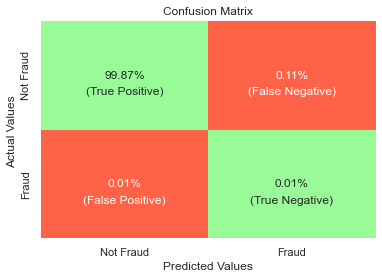


For DecisionTreeClassifier, Accuracy score is 0.9992720290679746 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314222
           1       0.67      0.68      0.68       351

    accuracy                           1.00    314573
   macro avg       0.84      0.84      0.84    314573
weighted avg       1.00      1.00      1.00    314573

[[314104    118]
 [   111    240]]


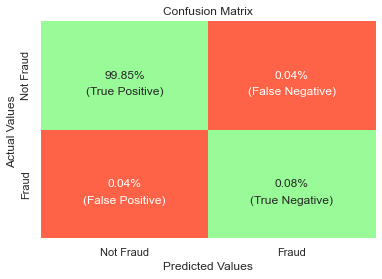


For KNeighborsClassifier, Accuracy score is 0.9989541378312824 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314476
           1       0.18      0.65      0.28        97

    accuracy                           1.00    314573
   macro avg       0.59      0.82      0.64    314573
weighted avg       1.00      1.00      1.00    314573

[[314181    295]
 [    34     63]]


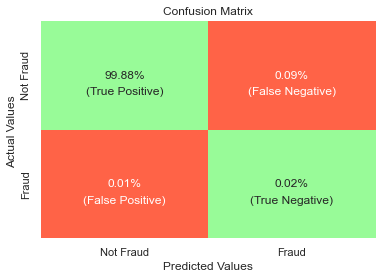


For RandomForestClassifier, Accuracy score is 0.999507268583127 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314304
           1       0.66      0.88      0.75       269

    accuracy                           1.00    314573
   macro avg       0.83      0.94      0.88    314573
weighted avg       1.00      1.00      1.00    314573

[[314182    122]
 [    33    236]]


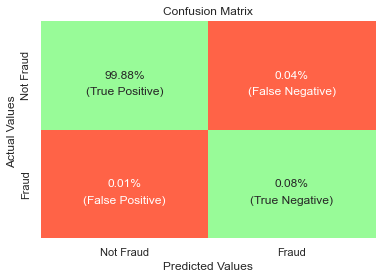

In [35]:
#loop through each model

for model in models:
    trainer(model, X_train, X_valid, y_train, y_valid)

## Model Evaluation
* ### Accuracy:

    The model with the best accuracy is Random Forest with 99.95% accuracy recorded. In contrast, Logistic Regression is the least accurate with an accuracy score of 99.87%.
    
However, because the dataset used is imbalanced, Accuracy is not an adequate metric to determine the best performing model. The Precision, Recall and F1-Score have to be taken into consideration.

**The confusion matrix shows:**

* False Positives - Actual 'Fraud' transactions that were predicted to be Not 'Fraud' (Type II Errors)
* False Negatives - Actual 'Not Fraud' transactions that were predicted to be 'Fraud' (Type I Errors also known as a False alarm)
    
In this scenario, the penalty for mislabeling a fraud transaction as legitimate (False Positive) is having a customer’s money stolen, which the Bank would typically reimburse. On the other hand, the penalty for mislabeling a legitimate transaction as fraud (False Negative) is having the user frozen out of their accounts and unable to make payments.

* ### Precision:
    The model with the best Precision of 70% is Random Forest 

* ### Recall:
    The model with the best Recall of 87% is Random Forest
    
* ### F1-Score:
    The model with the best F1-Score of 77% is Random Forest


### Random Forest has the best overall performance

## Feature Importance

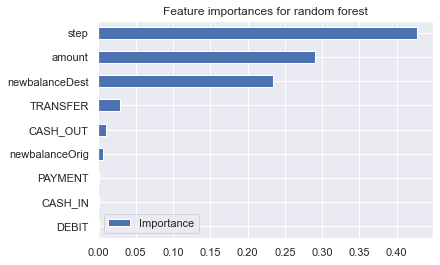

In [36]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [37]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['DEBIT', 'CASH_IN', 'PAYMENT', 'newbalanceOrig', 'CASH_OUT',
       'TRANSFER', 'newbalanceDest', 'amount', 'step'], dtype=object)

The major variables (top 5) that influence whether a transaction is Fraudulent or not (in order of importance) include:

* step
* amount
* newbalanceDest
* type (TRANSFER)
* type (CASH_OUT)

### The time of day (step), Transaction amount, Account balance, as the transaction type (Transfer and Cash out transactions)  are all important variables that must be monitored and put into consideration to determine if an online transaction is fraud or not.